In [1]:
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [2]:
import pandas as pd
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#(EDA & Cleaning)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# missing values
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

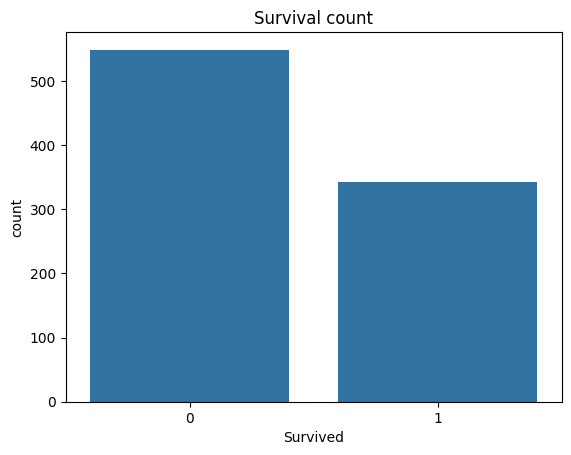

In [8]:
sns.countplot(data=df,x='Survived')
plt.title("Survival count")
plt.show

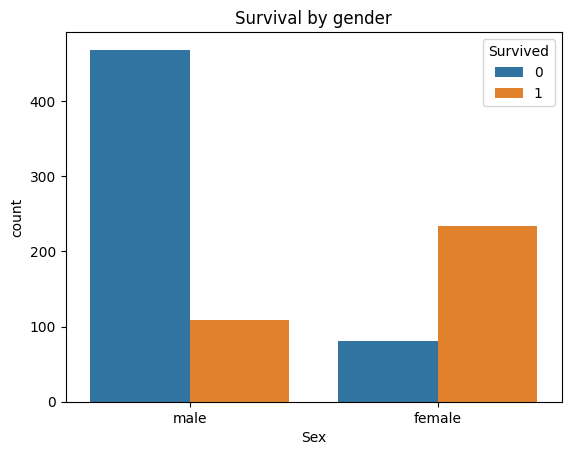

In [9]:
sns.countplot(data=df,x='Sex',hue='Survived')
plt.title("Survival by gender")
plt.show()

In [10]:
#Check for missing values

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
df.drop(columns=['Cabin'],inplace=True)
df.dropna(subset=['Embarked'],inplace=True)
df.fillna(df['Age'].mean(),inplace=True)

In [13]:
df['Sex']=df['Sex'].map({'male':0,'female':1})
df['Embarked']=df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [15]:
df.drop(['Name','Ticket','PassengerId'],axis=1,inplace=True)

In [17]:
X = df.drop('Survived'  , axis=1)
y=df['Survived']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
# Model Training - Decision Tree

In [22]:
from sklearn.tree  import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [23]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [24]:
y_pred = model.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test,y_pred)

In [27]:
print("accuracy:",accuracy)
print("Classification report:")
print(classification_report(y_test,y_pred))

accuracy: 0.7528089887640449
Classification report:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       109
           1       0.65      0.78      0.71        69

    accuracy                           0.75       178
   macro avg       0.75      0.76      0.75       178
weighted avg       0.77      0.75      0.76       178



In [28]:
#Feature Importance Visualization

In [30]:
importances = model.feature_importances_

feature_names = X.columns
feat_importance= pd.Series(importances,index=feature_names)
feat_importance.sort_values(ascending=True,inplace=True)

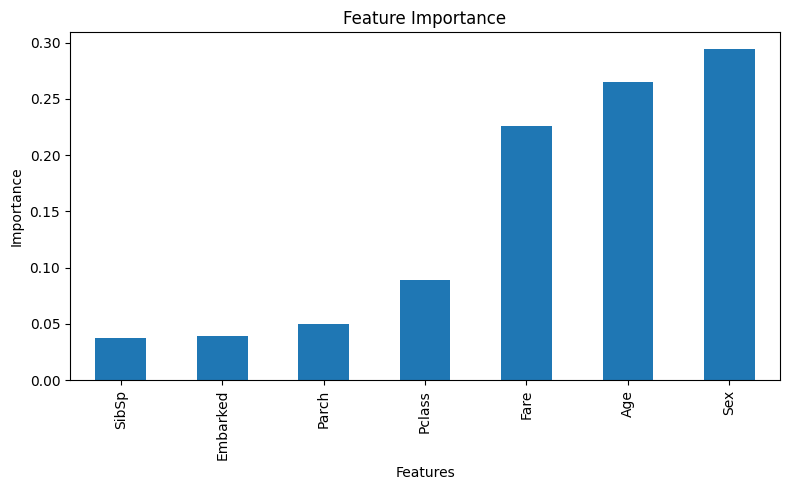

In [32]:
plt.figure(figsize=(8,5))
feat_importance.plot(kind='bar')
plt.title("Feature Importance")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.tight_layout()
plt.show()
